In [1]:
# Flag to indicate whether to test hyperparameters
test_hyperparameters = True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import RandomizedSearchCV

In [3]:
property_df = pd.read_parquet("../../data/raw/property_details_w_distances.parquet")

In [4]:
# List of columns to drop from the dataset
columns_to_drop = [
    'title',                # Title of the property listing
    'description',          # Description of the property
    'street_address',       # Street address of the property
    'suburb',               # Suburb where the property is located
    'structured_features',  # Structured features of the property
    'video_count',          # Number of videos available for the property
    'floor_plans_count',    # Number of floor plans available for the property
    'date_listed',          # Date when the property was listed
    'virtual_tour',         # Availability of a virtual tour for the property
    'latitude',             # Latitude coordinate of the property
    'longitude',            # Longitude coordinate of the property
    'primary_property_type' # Primary type of the property
]

In [5]:
target = np.array(property_df['price']) # target variable
features = np.array(property_df.drop(columns=columns_to_drop+['price']))
feature_list = list(property_df.drop(columns=columns_to_drop+['price']).columns)

In [6]:
# Split the data (70% train, 30% test)
data_train, data_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=30034)

# Function to evaluate a model
def evaluate_model(model, data_train, target_train, data_test, target_test):
    model.fit(data_train, target_train)
    predictions = model.predict(data_test)
    errors = abs(predictions - target_test)
    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

# RandomForestRegressor
print("RandomForestRegressor:")
rf = RandomForestRegressor(n_estimators=400, random_state=30034, max_features='sqrt', max_depth=None)
evaluate_model(rf, data_train, target_train, data_test, target_test)

# GradientBoostingRegressor
print("\nGradientBoostingRegressor:")
gb = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, random_state=30034)
evaluate_model(gb, data_train, target_train, data_test, target_test)

# Lasso
print("\nLasso:")
lasso = Lasso(alpha=0.01, random_state=30034)
evaluate_model(lasso, data_train, target_train, data_test, target_test)

# Ridge
print("\nRidge:")
ridge = Ridge(alpha=1.0, random_state=30034)
evaluate_model(ridge, data_train, target_train, data_test, target_test)

# XGBoost
print("\nXGBoost:")
xgb = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=30034)
evaluate_model(xgb, data_train, target_train, data_test, target_test)

# Support Vector Regressor
print("\nSupport Vector Regressor:")
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
evaluate_model(svr, data_train, target_train, data_test, target_test)

# K-Nearest Neighbors Regressor
print("\nK-Nearest Neighbors Regressor:")
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, data_train, target_train, data_test, target_test)

# Decision Tree Regressor
print("\nDecision Tree Regressor:")
tree = DecisionTreeRegressor(random_state=30034, max_depth=None)
evaluate_model(tree, data_train, target_train, data_test, target_test)

# ElasticNet
print("\nElasticNet:")
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=30034)
evaluate_model(elasticnet, data_train, target_train, data_test, target_test)

# AdaBoost
print("\nAdaBoost:")
adaboost = AdaBoostRegressor(n_estimators=400, learning_rate=0.1, random_state=30034)
evaluate_model(adaboost, data_train, target_train, data_test, target_test)


RandomForestRegressor:
Mean Absolute Error: 99.84
Accuracy: 85.34 %.

GradientBoostingRegressor:
Mean Absolute Error: 103.86
Accuracy: 84.71 %.

Lasso:
Mean Absolute Error: 159.51
Accuracy: 75.67 %.

Ridge:
Mean Absolute Error: 159.51
Accuracy: 75.67 %.

XGBoost:


/home/tumbles/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.269e+08, tolerance: 6.249e+04
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error: 104.14
Accuracy: 84.54 %.

Support Vector Regressor:
Mean Absolute Error: 175.88
Accuracy: 74.93 %.

K-Nearest Neighbors Regressor:
Mean Absolute Error: 168.73
Accuracy: 74.64 %.

Decision Tree Regressor:
Mean Absolute Error: 141.22
Accuracy: 79.06 %.

ElasticNet:
Mean Absolute Error: 159.35
Accuracy: 75.69 %.

AdaBoost:


/home/tumbles/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.273e+08, tolerance: 6.249e+04
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error: 356.15
Accuracy: 33.71 %.


In [7]:
if test_hyperparameters:
    # Define the hyperparameter grid for Random Forest
    rf_param_grid = {
        'n_estimators': [100, 200, 400, 600],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }

    # Instantiate the RandomForestRegressor
    rf = RandomForestRegressor(random_state=30034)

    # Set up RandomizedSearchCV
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid,
                                n_iter=50, cv=5, verbose=2, random_state=30034, n_jobs=-1)

    # Perform the search
    rf_random.fit(data_train, target_train)

    # Get the best parameters
    print("Best parameters for RandomForestRegressor:", rf_random.best_params_)

    # Evaluate on the test data
    best_rf = rf_random.best_estimator_
    rf_predictions = best_rf.predict(data_test)
    rf_mae = np.mean(abs(rf_predictions - target_test))
    print(f"RandomForestRegressor MAE: {rf_mae}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;

/home/tumbles/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
115 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tumbles/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tumbles/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/tumbles/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/tumbles

Best parameters for RandomForestRegressor: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
RandomForestRegressor MAE: 99.08335509512703


In [8]:
# Best parameters for RandomForestRegressor: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
# RandomForestRegressor
print("RandomForestRegressor:")
rf = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=20, bootstrap=False)
evaluate_model(rf, data_train, target_train, data_test, target_test)

RandomForestRegressor:
Mean Absolute Error: 98.01
Accuracy: 85.79 %.


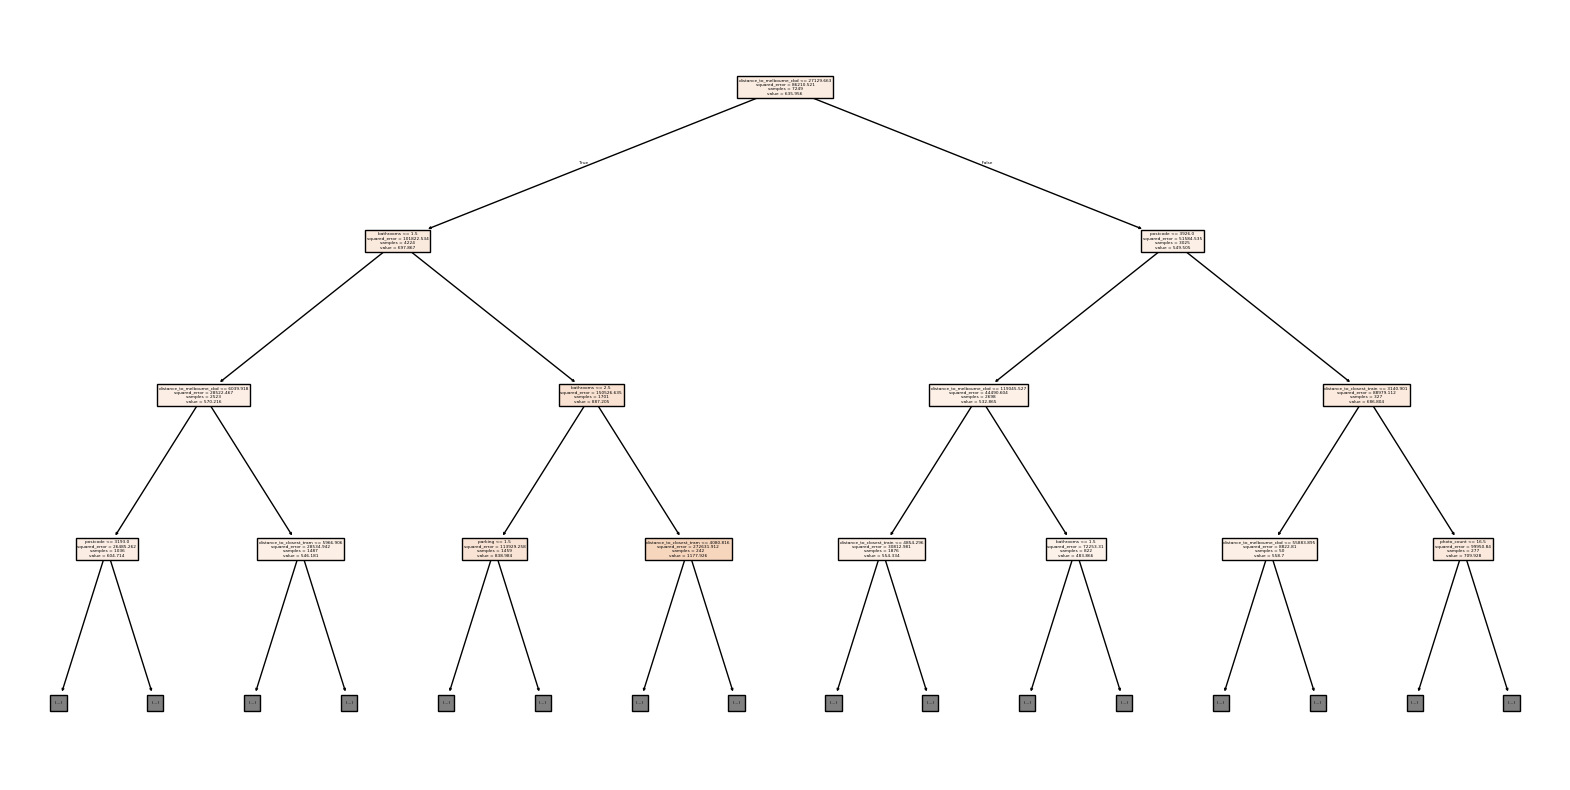

In [9]:
from sklearn.tree import plot_tree

# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=feature_list, filled=True, max_depth=3)
plt.savefig('../../plots/decision_tree.png')
plt.show()

In [10]:
# Get the feature importances from the random forest model
y = rf.feature_importances_

# Filter out the feature importances that are greater than 0.005
list_y = [a for a in y if a > 0.005]
print(list_y)

# Initialize an empty list to store the indices of the important features
list_of_index = []

# Find the indices of the important features
for i in list_y:
    a = np.where(y == i)
    list_of_index.append(a)
print(list_of_index)

# Manually set the list of indices (this line seems to override the previous logic)
list_of_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

[np.float64(0.09278828549279296), np.float64(0.12443882464766746), np.float64(0.1668027639588025), np.float64(0.06786108244385931), np.float64(0.05539287439385092), np.float64(0.055855753948220024), np.float64(0.039765915909842874), np.float64(0.05770257055742368), np.float64(0.036026718233004296), np.float64(0.1359752180648248), np.float64(0.11547816384355607), np.float64(0.05191182850615505)]
[(array([0]),), (array([1]),), (array([2]),), (array([3]),), (array([4]),), (array([5]),), (array([6]),), (array([7]),), (array([8]),), (array([9]),), (array([10]),), (array([11]),)]


In [11]:
# Initialize an empty list to store column names
col = []

# Iterate over the feature_list and append each feature to the col list
for i in feature_list:
    col.append(i)

# Initialize an empty list to store labels of important features
labels = []

# Iterate over the list_of_index and use the indices to get the corresponding feature names from col
for i in list_of_index:
    b = col[i]
    labels.append(b)

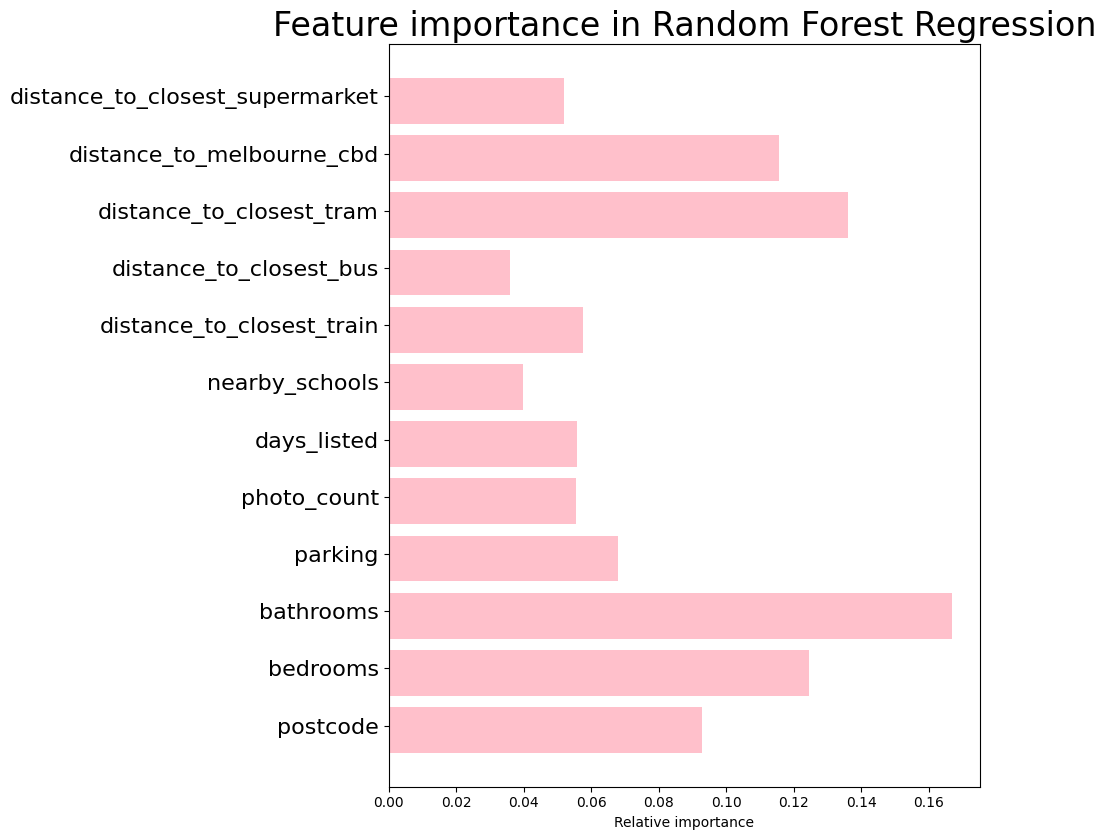

In [12]:
# Assign the list of important feature importances to y
y = list_y

# Create a horizontal bar plot to visualize feature importances
fig, ax = plt.subplots() 
width = 0.8  # Width of the bars
ind = np.arange(len(y))  # Indices for the bars

# Plot the horizontal bars
ax.barh(ind, y, width, color="pink")

# Set the y-ticks and their labels
ax.set_yticks(ind + width / 10)
ax.set_yticklabels(labels, minor=False, size=16)

# Set the title and x-axis label of the plot
plt.title('Feature importance in Random Forest Regression', size=24)
plt.xlabel('Relative importance')

# Set the size of the figure
fig.set_size_inches(10, 8.5, forward=True)

# Adjust the layout to fit everything nicely
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../../plots/feature_importance.png')

# Display the plot
plt.show()

In [13]:
from sklearn.model_selection import cross_val_predict

# Perform cross-validation prediction on the entire dataset
y_pred = cross_val_predict(rf, features, y=property_df['price'], cv=5)

# Calculate the absolute errors
errors = ((y_pred - property_df['price'])/y_pred) *100

# Add the prediction and error to the DataFrame
property_df['predicted_price'] = y_pred
property_df['error'] = errors

# Sort by the largest error to find the most mispriced properties
most_mispriced = property_df.sort_values(by='error', ascending=False)

# Lookup the street address of the most mispriced properties using the original index
most_mispriced = most_mispriced[['title', 'street_address', 'price', 'bedrooms', 'distance_to_melbourne_cbd', 'predicted_price', 'error']]

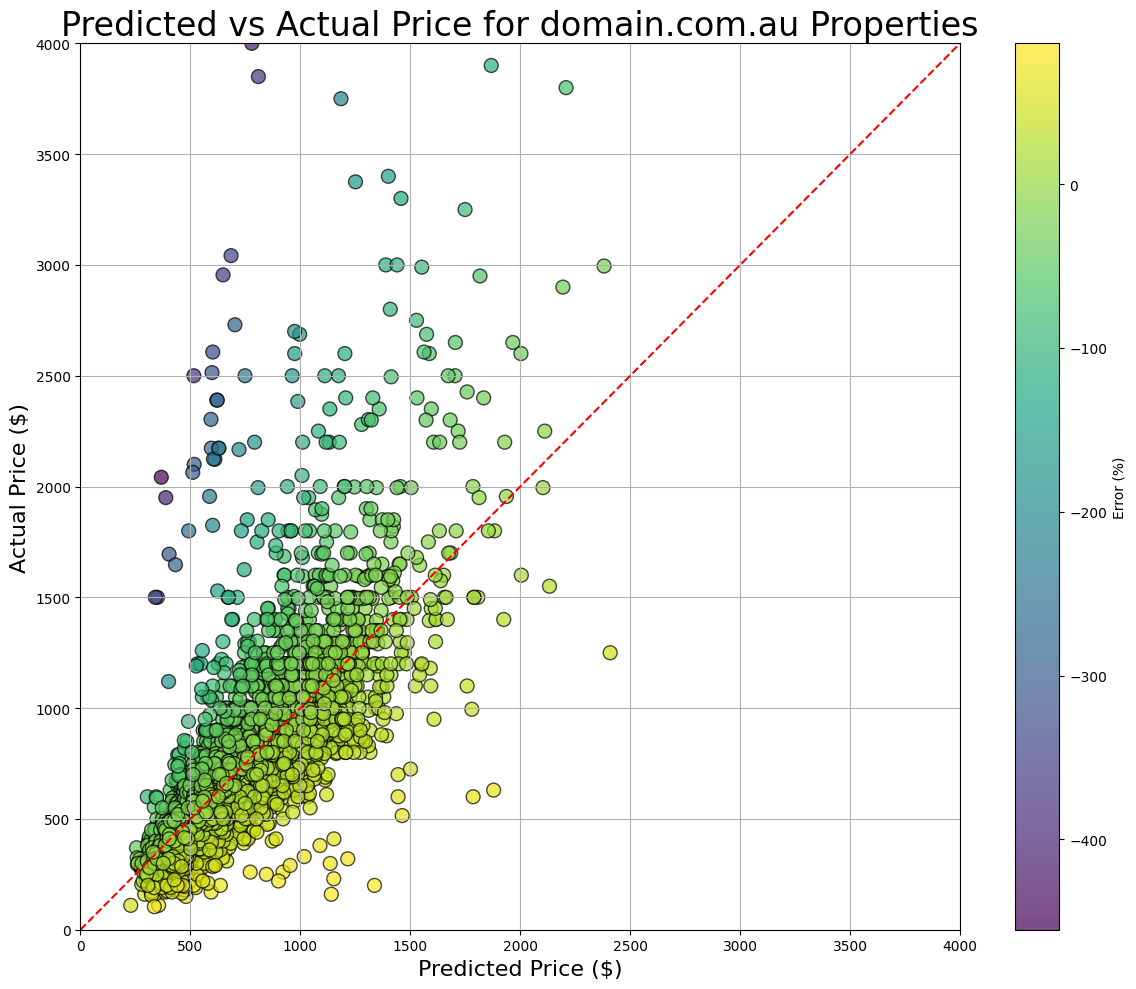

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_ylim([0, 4000])
ax.set_xlim([0, 4000])

# Scatter plot
scatter = ax.scatter(y_pred, property_df['price'], 
                     c=property_df['error'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)

# Correct the diagonal line (y = x)
ax.plot([0, 4000], [0, 4000], color='red', linestyle='--', label='y = x')

# Add colorbar for the error percentage
plt.colorbar(scatter, label='Error (%)')

# Set axis labels and title
ax.set_xlabel('Predicted Price ($)', size=16)
ax.set_ylabel('Actual Price ($)', size=16)
ax.set_title('Predicted vs Actual Price for domain.com.au Properties', size=24)

# Add grid for readability
ax.grid(True)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.savefig('../../plots/predicted_vs_actual_rent_price.png')
plt.show()